In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

In [ ]:
#have simplified columns names in the file
#If categorical variable, make sure you make them ordinal
df = pd.read_csv('file.csv')

df.head()

,Unnamed: 0,CustomerID,Genre,Age,Income,Score
0,0,1,0,19,15,39
1,1,2,0,21,15,81
2,2,3,1,20,16,6
3,3,4,1,23,16,77
4,4,5,1,31,17,40


In [ ]:
#select  3 column names
n = 3
a = []
for i in range(n):
  a.append(input("Enter column names : "))
data = pd.DataFrame()
for j in a:
  data[j]=df[j]



Enter column names : Age
Enter column names : Income
Enter column names : Score


In [ ]:
km_silhouette = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(data)
    preds = kmeans.predict(data)    
    silhouette = silhouette_score(data,preds)
    km_silhouette.append(silhouette)

cluster_n = int(km_silhouette.index(max(km_silhouette)))+1

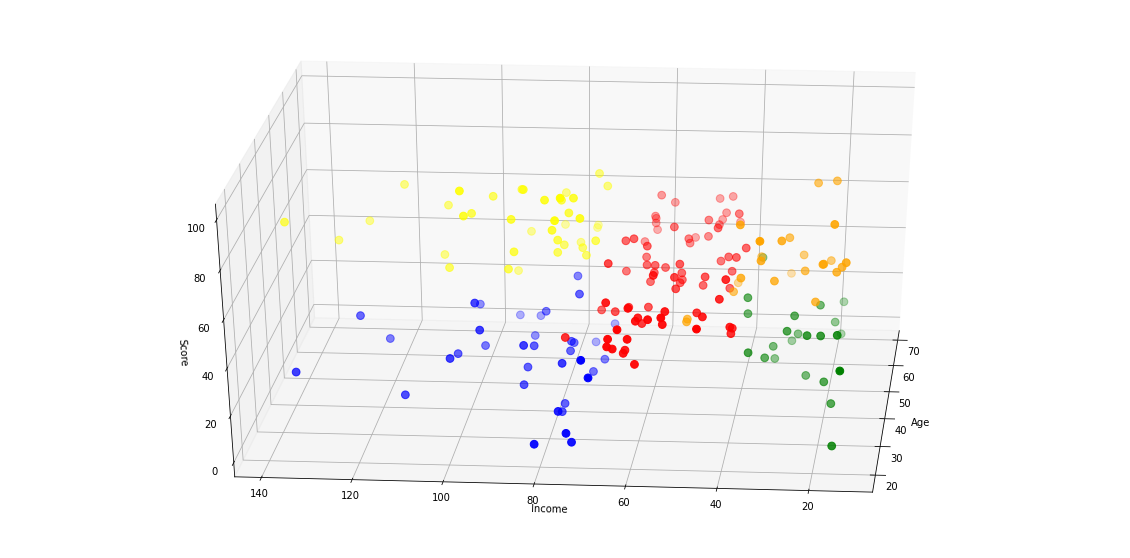

In [ ]:
km = KMeans(n_clusters=cluster_n)
clusters = km.fit_predict(data)
df["label"] = clusters

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
colors = ['blue','red','yellow','orange','green','purple']
count = 0
for i in range(cluster_n):
  ax.scatter(df[a[0]][df.label == i], df[a[1]][df.label == i], df[a[2]][df.label == i], c=colors[count], s=60)
  count+=1

ax.view_init(30, 185)
plt.xlabel(a[0])
plt.ylabel(a[1])
ax.set_zlabel(a[2])
plt.show()